In [ ]:
!pip install kaggle -q

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c playground-series-s5e5

  0% 0.00/12.5M [00:00<?, ?B/s]
100% 12.5M/12.5M [00:00<00:00, 1.13GB/s]


In [ ]:
!mkdir -p ./data/playground-series-s5e5
!unzip playground-series-s5e5.zip -d ./data/playground-series-s5e5
!ls ./data/playground-series-s5e5

Archive:  playground-series-s5e5.zip
  inflating: ./data/playground-series-s5e5/sample_submission.csv  
  inflating: ./data/playground-series-s5e5/test.csv  
  inflating: ./data/playground-series-s5e5/train.csv  
sample_submission.csv  test.csv  train.csv


In [ ]:
#!/bin/bash
!kaggle datasets download ruchikakumbhar/calories-burnt-prediction

Dataset URL: https://www.kaggle.com/datasets/ruchikakumbhar/calories-burnt-prediction
License(s): CC0-1.0
  0% 0.00/236k [00:00<?, ?B/s]
100% 236k/236k [00:00<00:00, 742MB/s]


In [ ]:
!mkdir -p ./data/calories-burnt-prediction
!unzip calories-burnt-prediction.zip -d ./data/calories-burnt-prediction
!ls ./data/calories-burnt-prediction

Archive:  calories-burnt-prediction.zip
  inflating: ./data/calories-burnt-prediction/calories.csv  
calories.csv


In [ ]:
!pip install catboost==1.2.8 -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 24.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train = pd.read_csv('./data/playground-series-s5e5/train.csv')
test = pd.read_csv('./data/playground-series-s5e5/test.csv')
original_df = pd.read_csv('/content/data/calories-burnt-prediction/calories.csv')

In [ ]:
original_df = original_df.rename({"Gender":"Sex"},axis=1)
original_df = original_df.rename({"User_ID":"id"},axis=1)
original_df['id'] = np.arange( len(original_df) ) + 1_000_000

In [ ]:
class CONFIG:
  TARGET = 'Calories'
  SEED_LIST = [12, 22, 32, 42, 52]

In [ ]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [ ]:
original_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1000000,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,1000001,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1000002,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,1000003,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,1000004,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
train.shape, test.shape, original_df.shape

((750000, 9), (250000, 8), (15000, 9))

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [ ]:
train["Calories"].describe()

,Calories
count,750000.000000
mean,88.282781
std,62.395349
min,1.000000
25%,34.000000
50%,77.000000
75%,136.000000
max,314.000000


In [ ]:
# sns.histplot(train["Calories"], kde=True, bins=50)

In [ ]:
# log_calories = np.log1p(train['Calories'])
# sns.histplot(log_calories, kde=True, bins=50)

In [ ]:
# sqrt_calories = np.sqrt(train['Calories'])
# sns.histplot(sqrt_calories, kde=True, bins=50)

In [ ]:
# train = train.drop("id", axis=1)
# test = test.drop("id", axis=1)

numerical_features = train.select_dtypes(include=["number"]).columns.tolist()
numerical_features.remove("Calories")
categorical_features = train.select_dtypes(include=['object']).columns

In [ ]:


# plt.figure(figsize=(15,10))
# for i,col in enumerate(numerical_features):
#   plt.subplot(3,3,i+1)
#   sns.histplot(train[col], kde=True, bins=50, label="Train")
#   # sns.histplot(test[col], kde=True, bins=50, label="Test")
#   # sns.histplot(original_df[col], kde=True, bins=50, label="Original")
#   plt.title(col)
#   plt.legend()

# plt.tight_layout()
# plt.show()

In [ ]:

# plt.figure(figsize=(15,10))
# for i,col in enumerate(numerical_features):
#   plt.subplot(3,3,i+1)
#   # sns.histplot(train[col], kde=True, bins=50, label="Train")
#   sns.histplot(test[col], kde=True, bins=50, label="Test")
#   # sns.histplot(original_df[col], kde=True, bins=50, label="Original")
#   plt.title(col)
#   plt.legend()

# plt.tight_layout()
# plt.show()

In [ ]:

# plt.figure(figsize=(15,10))
# for i,col in enumerate(numerical_features):
#   plt.subplot(3,3,i+1)
#   # sns.histplot(train[col], kde=True, bins=50, label="Train")
#   # sns.histplot(test[col], kde=True, bins=50, label="Test")
#   sns.histplot(original_df[col], kde=True, bins=50, label="Original")
#   plt.title(col)
#   plt.legend()

# plt.tight_layout()
# plt.show()

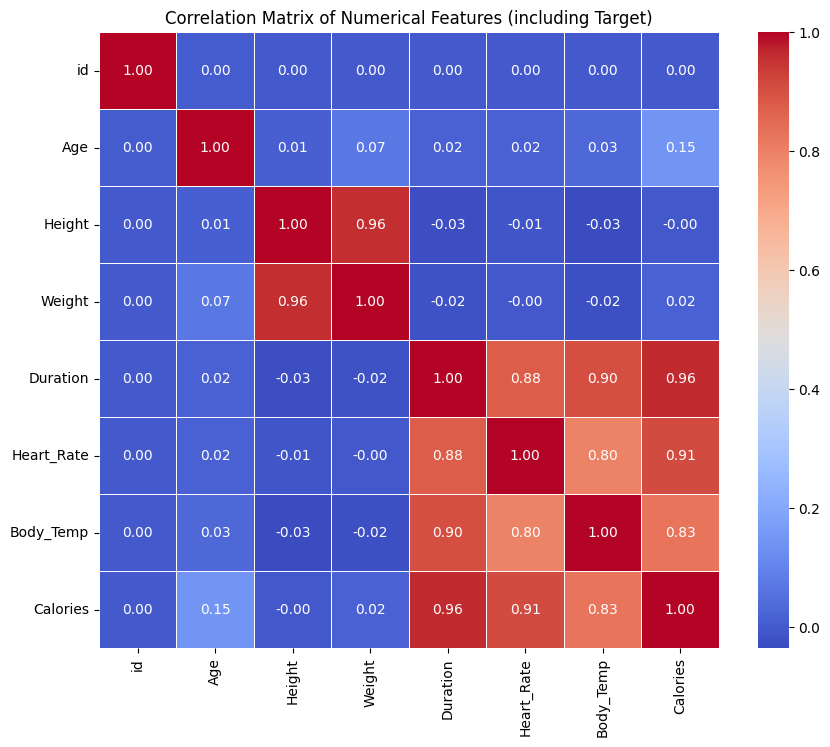

In [ ]:
numerical_with_target = numerical_features + ['Calories']
correlation_matrix = train[numerical_with_target].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features (including Target)')
plt.show()

In [ ]:
for df in [train, test, original_df]:
    df['Sex'] = df['Sex'].map({'male':0,'female':1}).astype("category")

In [ ]:
train['Age'].describe()

,Age
count,750000.000000
mean,41.420404
std,15.175049
min,20.000000
25%,28.000000
50%,40.000000
75%,52.000000
max,79.000000


In [ ]:
def add_feature_cross_terms(df, numerical_features):
    df_new = df.copy()

    return df_new

train = add_feature_cross_terms(train, numerical_features)
test = add_feature_cross_terms(test, numerical_features)
original_df = add_feature_cross_terms(original_df, numerical_features)

In [ ]:
numerical_features = train.select_dtypes(include=["number"]).columns.tolist()
categorical_features = train.select_dtypes(include=['category']).columns
numerical_features.remove("Calories")
numerical_features.remove("id")

In [ ]:
def rmsle(y_true, y_pred):
  y_true = np.array(y_true)
  y_pred = np.array(y_pred)
  if np.any(y_true < 0):
    raise ValueError("RMSLE is not defined for negative true values.")

  y_pred = np.maximum(0, y_pred)
  log_true = np.log1p(y_true)
  log_pred = np.log1p(y_pred)

  squared_log_errors = (log_pred - log_true) ** 2

  mean_squared_log_error = np.mean(squared_log_errors)

  return np.sqrt(mean_squared_log_error)

In [ ]:
FEATURES = numerical_features + list(categorical_features)
# FEATURES.remove("id")

In [ ]:
FEATURES

['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Sex']

In [ ]:
train.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,0,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,1,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,1,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,0,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,1,38,166.0,61.0,25.0,102.0,40.6,146.0


## SKLEARN LINEAR REG.

## SKLEARN KNN

In [ ]:
%load_ext cuml.accel

[2025-05-30 20:12:14.497] [CUML] [info] cuML: Installed accelerator for sklearn.
[2025-05-30 20:12:39.136] [CUML] [info] cuML: Installed accelerator for umap.
[2025-05-30 20:12:39.196] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-05-30 20:12:39.196] [CUML] [info] cuML: Successfully initialized accelerator.


In [ ]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor

oof_preds_knn_seed = []
test_preds_knn_seed = []

KNN_FEATURES = FEATURES
KNN_FEATURES.remove("Body_Temp")
KNN_FEATURES.remove("Height")

knn_numerical_features = numerical_features.copy()
knn_numerical_features.remove("Body_Temp")
knn_numerical_features.remove("Height")


for seed in CONFIG.SEED_LIST:

    FOLDS = 10
    kf = KFold(n_splits=FOLDS, shuffle=True, random_state=seed)

    oof_preds_knn = np.zeros(len(train))
    test_preds_knn = np.zeros(len(test))


    for i, (train_idx, valid_idx) in enumerate(kf.split(train)):

        print(f"\n{'#'*28} Training with seed: {seed}")
        print(f"{'#'*10} Fold {i+1} {'#'*10}")
        print(f"{'#'*28}")

        # TRAIN
        X_train = train.loc[train_idx,KNN_FEATURES].copy()
        y_train = train.loc[train_idx,CONFIG.TARGET]
        y_train = np.log1p(y_train)

        cat_features = [X_train.columns.get_loc(col) for col in categorical_features]

        # EXTRA DATA
        for k in range(1):
            X_train = pd.concat([X_train, original_df[KNN_FEATURES]],axis=0)
            y_train = pd.concat([y_train, np.log1p(original_df[CONFIG.TARGET])] ,axis=0)

        # VALID
        X_valid = train.loc[valid_idx,KNN_FEATURES].copy()
        y_valid = train.loc[valid_idx, CONFIG.TARGET]
        y_valid = np.log1p(y_valid)

        # TEST
        X_test = test[KNN_FEATURES].copy()

        # NORMALIZE FOR NN
        print("Normalizing...", end='')
        norm_cols = [c for c in knn_numerical_features if c not in []]
        min_values = X_train[norm_cols].min()
        max_values = X_train[norm_cols].max()
        X_train[norm_cols] = (X_train[norm_cols] - min_values) / (max_values - min_values)
        X_valid[norm_cols] = (X_valid[norm_cols] - min_values) / (max_values - min_values)
        X_test[norm_cols] = (X_test[norm_cols] - min_values) / (max_values - min_values)

        print("done")

        model = KNeighborsRegressor(n_neighbors=10, leaf_size=50)
        print("Training a KNN Model...")
        model.fit(
            X_train, y_train,
        )
        print("Training complete.")

        oof_preds_knn[valid_idx] = model.predict(X_valid)
        test_preds_knn += model.predict(X_test) / FOLDS

        rmse = rmsle(np.expm1(y_valid), np.expm1(oof_preds_knn[valid_idx]))
        print(f"Fold {i+1} RMSE: {rmse:.5f}")

    oof_preds_knn_seed.append(oof_preds_knn)
    test_preds_knn_seed.append(test_preds_knn)

oof_preds_knn = np.mean(oof_preds_knn_seed, axis=0)
test_preds_knn = np.mean(test_preds_knn_seed, axis=0)


############################ Training with seed: 12
########## Fold 1 ##########
############################
Normalizing...done
[2025-05-30 20:12:39.417] [CUML] [info] Unused keyword parameter: leaf_size during cuML estimator initialization
Training a KNN Model...
Training complete.
Fold 1 RMSE: 0.06513

############################ Training with seed: 12
########## Fold 2 ##########
############################
Normalizing...done
[2025-05-30 20:12:43.029] [CUML] [info] Unused keyword parameter: leaf_size during cuML estimator initialization
Training a KNN Model...
Training complete.
Fold 2 RMSE: 0.06565

############################ Training with seed: 12
########## Fold 3 ##########
############################
Normalizing...done
[2025-05-30 20:12:45.756] [CUML] [info] Unused keyword parameter: leaf_size during cuML estimator initialization
Training a KNN Model...
Training complete.
Fold 3 RMSE: 0.06536

############################ Training with seed: 12
########## Fold 4 ########

In [ ]:
full_rmsle = rmsle(train[CONFIG.TARGET], np.expm1(oof_preds_knn))
print(f"Overall CV RMSLE: {full_rmsle:.5f}")

Overall CV RMSLE: 0.06437


In [ ]:
np.save('oof_preds_knn.npy', oof_preds_knn)

In [ ]:
mn = train.Calories.min()
mx = train.Calories.max()
test['Calories'] = np.clip( np.expm1( test_preds_knn ),mn,mx )
test[['id','Calories']].to_csv("submission_knn.csv",index=False)
test[['id','Calories']].head()

,id,Calories
0,750000,28.211640
1,750001,106.237729
2,750002,88.423613
3,750003,123.819300
4,750004,75.221481


### PYTABKIT

In [ ]:
!pip install pytabkit -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 342.5/342.5 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 40.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pytabkit

In [ ]:
from pytabkit import RealMLP_TD_Regressor
from pytabkit import TabM_D_Regressor
from pytabkit import Resnet_RTDL_D_Regressor
from pytabkit import RF_SKL_D_Regressor

In [ ]:
rf_params = {
    'device': 'cuda:0',
    'n_cv': 3,
}

rf_model = RF_SKL_D_Regressor(**rf_params, random_state=42)

In [ ]:
!pip install skorch -qq

In [ ]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_preds_rf = np.zeros(len(train))
test_preds_rf = np.zeros(len(test))


for i, (train_idx, valid_idx) in enumerate(kf.split(train)):

    print(f"\n{'#'*28}")
    print(f"{'#'*10} Fold {i+1} {'#'*10}")
    print(f"{'#'*28}")

    # TRAIN
    X_train = train.loc[train_idx,FEATURES].copy()
    y_train = train.loc[train_idx,CONFIG.TARGET]
    y_train = np.log1p(y_train)

    # cat_features = [X_train.columns.get_loc(col) for col in categorical_features]

    # EXTRA DATA
    for k in range(4):
        X_train = pd.concat([X_train, original_df[FEATURES]],axis=0)
        y_train = pd.concat([y_train, np.log1p(original_df[CONFIG.TARGET])] ,axis=0)

    # VALID
    X_valid = train.loc[valid_idx,FEATURES].copy()
    y_valid = train.loc[valid_idx, CONFIG.TARGET]
    y_valid = np.log1p(y_valid)

    # TEST
    X_test = test[FEATURES].copy()

    # NORMALIZE FOR NN
    print("Normalizing...", end='')
    norm_cols = [c for c in numerical_features if c not in []]
    means = X_train[norm_cols].mean()
    stds = X_train[norm_cols].std() + 1e-8
    # stds = stds.replace(0, 1)
    X_train[norm_cols] = (X_train[norm_cols] - means) / stds
    X_valid[norm_cols] = (X_valid[norm_cols] - means) / stds
    X_test[norm_cols] = (X_test[norm_cols] - means) / stds
    print("done")

    model = rf_model
    print("Training an RF Model...")
    model.fit(
        X_train, y_train,
    )
    print("Training complete.")

    oof_preds_rf[valid_idx] = model.predict(X_valid)
    test_preds_rf += model.predict(X_test) / FOLDS

    rmse = rmsle(np.expm1(y_valid), np.expm1(oof_preds_rf[valid_idx]))
    print(f"Fold {i+1} RMSE: {rmse:.5f}")



############################
########## Fold 1 ##########
############################
Normalizing...done
Training an RF Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 1 RMSE: 0.06134

############################
########## Fold 2 ##########
############################
Normalizing...done
Training an RF Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 2 RMSE: 0.06292

############################
########## Fold 3 ##########
############################
Normalizing...done
Training an RF Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 3 RMSE: 0.06193

############################
########## Fold 4 ##########
############################
Normalizing...done
Training an RF Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 4 RMSE: 0.06185

############################
########## Fold 5 ##########
############################
Normalizing...done
Training an RF Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 5 RMSE: 0.06162


In [ ]:
full_rmsle = rmsle(train[CONFIG.TARGET], np.expm1(oof_preds_rf))
print(f"Overall CV RMSLE: {full_rmsle:.5f}")

Overall CV RMSLE: 0.06194


In [ ]:
np.save("oof_preds_rf.npy", oof_preds_rf)

In [ ]:
mn = train.Calories.min()
mx = train.Calories.max()
test['Calories'] = np.clip( np.expm1( test_preds_rf ),mn,mx )
test[['id','Calories']].to_csv("submission_rf.csv",index=False)
test[['id','Calories']].head()

,id,Calories
0,750000,27.127426
1,750001,107.413598
2,750002,87.695367
3,750003,126.471737
4,750004,75.375982


In [ ]:
resnet_params = {
    'device': 'cuda:0',
    'n_cv': 3,
    'lr': 0.01,
    'max_epochs': 20,
    'lr_scheduler': 'quad'
}

resnet_model = Resnet_RTDL_D_Regressor(**resnet_params, random_state=42)

In [ ]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_preds_resnet = np.zeros(len(train))
test_preds_resnet = np.zeros(len(test))


for i, (train_idx, valid_idx) in enumerate(kf.split(train)):

    print(f"\n{'#'*28}")
    print(f"{'#'*10} Fold {i+1} {'#'*10}")
    print(f"{'#'*28}")

    # TRAIN
    X_train = train.loc[train_idx,FEATURES].copy()
    y_train = train.loc[train_idx,CONFIG.TARGET]
    y_train = np.log1p(y_train)

    # cat_features = [X_train.columns.get_loc(col) for col in categorical_features]

    # EXTRA DATA
    for k in range(4):
        X_train = pd.concat([X_train, original_df[FEATURES]],axis=0)
        y_train = pd.concat([y_train, np.log1p(original_df[CONFIG.TARGET])] ,axis=0)

    # VALID
    X_valid = train.loc[valid_idx,FEATURES].copy()
    y_valid = train.loc[valid_idx, CONFIG.TARGET]
    y_valid = np.log1p(y_valid)

    # TEST
    X_test = test[FEATURES].copy()

    # NORMALIZE FOR NN
    print("Normalizing...", end='')
    norm_cols = [c for c in numerical_features if c not in []]
    means = X_train[norm_cols].mean()
    stds = X_train[norm_cols].std() + 1e-8
    # stds = stds.replace(0, 1)
    X_train[norm_cols] = (X_train[norm_cols] - means) / stds
    X_valid[norm_cols] = (X_valid[norm_cols] - means) / stds
    X_test[norm_cols] = (X_test[norm_cols] - means) / stds
    print("done")

    model = resnet_model
    print("Training an RF Model...")
    model.fit(
        X_train, y_train,
    )
    print("Training complete.")

    oof_preds_resnet[valid_idx] = model.predict(X_valid)
    test_preds_resnet += model.predict(X_test) / FOLDS

    rmse = rmsle(np.expm1(y_valid), np.expm1(oof_preds_resnet[valid_idx]))
    print(f"Fold {i+1} RMSE: {rmse:.5f}")



############################
########## Fold 1 ##########
############################
Normalizing...done
Training an RF Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RTDL regressor
[('epoch_timer', <skorch.callbacks.logging.EpochTimer object at 0x78d283b46c90>), ('train_loss', <skorch.callbacks.scoring.PassthroughScoring object at 0x78d28bada690>), ('valid_loss', <skorch.callbacks.scoring.PassthroughScoring object at 0x78d28bad8a50>), ('print_log', <skorch.callbacks.logging.PrintLog object at 0x78d28badb790>)]
Initializing UniquePrefixCheckpoint
fn_prefix is 132845770538000
A checkpoint was triggered in epoch 2.
  epoch    constant_val_mse    train_loss    valid_loss    cp      lr      dur
-------  ------------------  ------------  ------------  ----  ------  -------
      1              1.0024        0.0297        0.0073     +  0.0100  20.8379
A checkpoint was triggered in epoch 3.
      2              1.0024        0.0248        0.0048     +  0.0100  20.7360
      3              1.0024        0.0235        0.0080        0.0100  20.7528
      4              1.0024        0.0237        0.0263        0.0100  20.7591
      5              1.0024      

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 1 RMSE: 0.06322

############################
########## Fold 2 ##########
############################
Normalizing...done
Training an RF Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RTDL regressor
[('epoch_timer', <skorch.callbacks.logging.EpochTimer object at 0x78d1dbea6c90>), ('train_loss', <skorch.callbacks.scoring.PassthroughScoring object at 0x78d1dbc301d0>), ('valid_loss', <skorch.callbacks.scoring.PassthroughScoring object at 0x78d1dbc53f90>), ('print_log', <skorch.callbacks.logging.PrintLog object at 0x78d1dbce51d0>)]
Initializing UniquePrefixCheckpoint
fn_prefix is 132842765254800
A checkpoint was triggered in epoch 2.
  epoch    constant_val_mse    train_loss    valid_loss    cp      lr      dur
-------  ------------------  ------------  ------------  ----  ------  -------
      1              1.0010        0.0294        0.0058     +  0.0100  20.6235
      2              1.0010        0.0257        0.0221        0.0100  20.7240
      3              1.0010        0.0248        0.0118        0.0100  20.8677
      4              1.0010        0.0235        0.0107        0.0100  20.8252
      5              1.0010        0.0226        0.0064        0.0100  2

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 2 RMSE: 0.06509

############################
########## Fold 3 ##########
############################
Normalizing...done
Training an RF Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RTDL regressor
[('epoch_timer', <skorch.callbacks.logging.EpochTimer object at 0x78d29072e150>), ('train_loss', <skorch.callbacks.scoring.PassthroughScoring object at 0x78d2908d4610>), ('valid_loss', <skorch.callbacks.scoring.PassthroughScoring object at 0x78d2908d4190>), ('print_log', <skorch.callbacks.logging.PrintLog object at 0x78d2908d4750>)]
Initializing UniquePrefixCheckpoint
fn_prefix is 132842194616912
A checkpoint was triggered in epoch 2.
  epoch    constant_val_mse    train_loss    valid_loss    cp      lr      dur
-------  ------------------  ------------  ------------  ----  ------  -------
      1              1.0047        0.0298        0.0070     +  0.0100  20.6672
      2              1.0047        0.0243        0.0070        0.0100  20.6963
A checkpoint was triggered in epoch 4.
      3              1.0047        0.0240        0.0054     +  0.0100  20.7654
      4              1.0047        0.0233        0.0055        0.0100  20.7386
      5              1.0047      

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 3 RMSE: 0.06431

############################
########## Fold 4 ##########
############################
Normalizing...done
Training an RF Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RTDL regressor
[('epoch_timer', <skorch.callbacks.logging.EpochTimer object at 0x78d1dbc301d0>), ('train_loss', <skorch.callbacks.scoring.PassthroughScoring object at 0x78d28bf8ec90>), ('valid_loss', <skorch.callbacks.scoring.PassthroughScoring object at 0x78d1dbfe2a90>), ('print_log', <skorch.callbacks.logging.PrintLog object at 0x78d1dbfe2850>)]
Initializing UniquePrefixCheckpoint
fn_prefix is 132842731916560
A checkpoint was triggered in epoch 2.
  epoch    constant_val_mse    train_loss    valid_loss    cp      lr      dur
-------  ------------------  ------------  ------------  ----  ------  -------
      1              1.0002        0.0292        0.0207     +  0.0100  20.9085
A checkpoint was triggered in epoch 3.
      2              1.0002        0.0248        0.0072     +  0.0100  20.7821
      3              1.0002        0.0246        0.0086        0.0100  20.7998
      4              1.0002        0.0237        0.0089        0.0100  20.7710
      5              1.0002      

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 4 RMSE: 0.06593

############################
########## Fold 5 ##########
############################
Normalizing...done
Training an RF Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


RTDL regressor
[('epoch_timer', <skorch.callbacks.logging.EpochTimer object at 0x78d1bfef6150>), ('train_loss', <skorch.callbacks.scoring.PassthroughScoring object at 0x78d2801901d0>), ('valid_loss', <skorch.callbacks.scoring.PassthroughScoring object at 0x78d280191650>), ('print_log', <skorch.callbacks.logging.PrintLog object at 0x78d2801926d0>)]
Initializing UniquePrefixCheckpoint
fn_prefix is 132842696470544
A checkpoint was triggered in epoch 2.
  epoch    constant_val_mse    train_loss    valid_loss    cp      lr      dur
-------  ------------------  ------------  ------------  ----  ------  -------
      1              1.0025        0.0298        0.0061     +  0.0100  20.7801
      2              1.0025        0.0245        0.0105        0.0100  20.7118
      3              1.0025        0.0239        0.0162        0.0100  20.6894
      4              1.0025        0.0237        0.0199        0.0100  20.6292
      5              1.0025        0.0227        0.0092        0.0100  2

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 5 RMSE: 0.06475


In [ ]:
full_rmsle = rmsle(train[CONFIG.TARGET], np.expm1(oof_preds_resnet))
print(f"Overall CV RMSLE: {full_rmsle:.5f}")

Overall CV RMSLE: 0.06467


In [ ]:
np.save("oof_preds_resnet.npy", oof_preds_resnet)

In [ ]:
mn = train.Calories.min()
mx = train.Calories.max()
test['Calories'] = np.clip( np.expm1( test_preds_resnet ),mn,mx )
test[['id','Calories']].to_csv("submission_resnet.csv",index=False)
test[['id','Calories']].head()

,id,Calories
0,750000,27.402541
1,750001,109.342785
2,750002,88.166032
3,750003,126.801420
4,750004,76.715959


In [ ]:
realmlp_params = {
    'n_cv'                : 3,
    'n_epochs'            : 50,
    'batch_size'          : 1024*4,
    'verbosity'           : 2,
    'lr'                  : 0.01,
    'lr_sched'            : 'quad',
    'max_one_hot_cat_size': 64,
    'embedding_size'      : 256,
    'device'              : 'cuda:0',
    'tfms'                : ["one_hot", "median_center", "robust_scale", "smooth_clip", "embedding", "l1_normalize"],
}

realmlp_model = RealMLP_TD_Regressor(**realmlp_params, random_state=42)

In [ ]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_preds_realmlp = np.zeros(len(train))
test_preds_realmlp = np.zeros(len(test))


for i, (train_idx, valid_idx) in enumerate(kf.split(train)):

    print(f"\n{'#'*28}")
    print(f"{'#'*10} Fold {i+1} {'#'*10}")
    print(f"{'#'*28}")

    # TRAIN
    X_train = train.loc[train_idx,FEATURES].copy()
    y_train = train.loc[train_idx,CONFIG.TARGET]
    y_train = np.log1p(y_train)

    # cat_features = [X_train.columns.get_loc(col) for col in categorical_features]

    # EXTRA DATA
    for k in range(4):
        X_train = pd.concat([X_train, original_df[FEATURES]],axis=0)
        y_train = pd.concat([y_train, np.log1p(original_df[CONFIG.TARGET])] ,axis=0)

    # VALID
    X_valid = train.loc[valid_idx,FEATURES].copy()
    y_valid = train.loc[valid_idx, CONFIG.TARGET]
    y_valid = np.log1p(y_valid)

    # TEST
    X_test = test[FEATURES].copy()

    # NORMALIZE FOR NN
    # print("Normalizing...", end='')
    # norm_cols = [c for c in numerical_features if c not in []]
    # means = X_train[norm_cols].mean()
    # stds = X_train[norm_cols].std() + 1e-8
    # # stds = stds.replace(0, 1)
    # X_train[norm_cols] = (X_train[norm_cols] - means) / stds
    # X_valid[norm_cols] = (X_valid[norm_cols] - means) / stds
    # X_test[norm_cols] = (X_test[norm_cols] - means) / stds
    # print("done")

    model = realmlp_model
    print("Training a RealMLP Model...")
    model.fit(
        X_train, y_train,
    )
    print("Training complete.")

    oof_preds_realmlp[valid_idx] = model.predict(X_valid)
    test_preds_realmlp += model.predict(X_test) / FOLDS

    rmse = rmsle(np.expm1(y_valid), np.expm1(oof_preds_realmlp[valid_idx]))
    print(f"Fold {i+1} RMSE: {rmse:.5f}")



############################
########## Fold 1 ##########
############################
Training a RealMLP Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Columns classified as continuous: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
Columns classified as categorical: ['Sex']


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/50: val rmse = 0.100777
Epoch 2/50: val rmse = 0.084464
Epoch 3/50: val rmse = 0.071397
Epoch 4/50: val rmse = 0.068160
Epoch 5/50: val rmse = 0.064679
Epoch 6/50: val rmse = 0.065821
Epoch 7/50: val rmse = 0.065038
Epoch 8/50: val rmse = 0.062969
Epoch 9/50: val rmse = 0.063966
Epoch 10/50: val rmse = 0.061278
Epoch 11/50: val rmse = 0.063816
Epoch 12/50: val rmse = 0.061694
Epoch 13/50: val rmse = 0.062485
Epoch 14/50: val rmse = 0.060817
Epoch 15/50: val rmse = 0.064002
Epoch 16/50: val rmse = 0.060789
Epoch 17/50: val rmse = 0.061522
Epoch 18/50: val rmse = 0.060063
Epoch 19/50: val rmse = 0.061757
Epoch 20/50: val rmse = 0.060233
Epoch 21/50: val rmse = 0.060563
Epoch 22/50: val rmse = 0.060180
Epoch 23/50: val rmse = 0.059950
Epoch 24/50: val rmse = 0.061823
Epoch 25/50: val rmse = 0.060773
Epoch 26/50: val rmse = 0.060920
Epoch 27/50: val rmse = 0.060025
Epoch 28/50: val rmse = 0.060618
Epoch 29/50: val rmse = 0.060224
Epoch 30/50: val rmse = 0.060130
Epoch 31/50: val rm

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Fold 1 RMSE: 0.06019

############################
########## Fold 2 ##########
############################
Training a RealMLP Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Columns classified as continuous: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
Columns classified as categorical: ['Sex']


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/50: val rmse = 0.095336
Epoch 2/50: val rmse = 0.077663
Epoch 3/50: val rmse = 0.079025
Epoch 4/50: val rmse = 0.068064
Epoch 5/50: val rmse = 0.064740
Epoch 6/50: val rmse = 0.065281
Epoch 7/50: val rmse = 0.063267
Epoch 8/50: val rmse = 0.064372
Epoch 9/50: val rmse = 0.060731
Epoch 10/50: val rmse = 0.062831
Epoch 11/50: val rmse = 0.065583
Epoch 12/50: val rmse = 0.061055
Epoch 13/50: val rmse = 0.061838
Epoch 14/50: val rmse = 0.061276
Epoch 15/50: val rmse = 0.060771
Epoch 16/50: val rmse = 0.060181
Epoch 17/50: val rmse = 0.060045
Epoch 18/50: val rmse = 0.060568
Epoch 19/50: val rmse = 0.060580
Epoch 20/50: val rmse = 0.059769
Epoch 21/50: val rmse = 0.060313
Epoch 22/50: val rmse = 0.061465
Epoch 23/50: val rmse = 0.060084
Epoch 24/50: val rmse = 0.060308
Epoch 25/50: val rmse = 0.060497
Epoch 26/50: val rmse = 0.059236
Epoch 27/50: val rmse = 0.059802
Epoch 28/50: val rmse = 0.059775
Epoch 29/50: val rmse = 0.059871
Epoch 30/50: val rmse = 0.059133
Epoch 31/50: val rm

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Fold 2 RMSE: 0.06167

############################
########## Fold 3 ##########
############################
Training a RealMLP Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Columns classified as continuous: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
Columns classified as categorical: ['Sex']


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/50: val rmse = 0.100573
Epoch 2/50: val rmse = 0.076903
Epoch 3/50: val rmse = 0.070573
Epoch 4/50: val rmse = 0.070093
Epoch 5/50: val rmse = 0.066892
Epoch 6/50: val rmse = 0.068689
Epoch 7/50: val rmse = 0.068302
Epoch 8/50: val rmse = 0.065987
Epoch 9/50: val rmse = 0.062230
Epoch 10/50: val rmse = 0.062165
Epoch 11/50: val rmse = 0.066018
Epoch 12/50: val rmse = 0.064618
Epoch 13/50: val rmse = 0.062386
Epoch 14/50: val rmse = 0.062870
Epoch 15/50: val rmse = 0.061799
Epoch 16/50: val rmse = 0.060555
Epoch 17/50: val rmse = 0.062572
Epoch 18/50: val rmse = 0.060974
Epoch 19/50: val rmse = 0.061383
Epoch 20/50: val rmse = 0.060221
Epoch 21/50: val rmse = 0.061024
Epoch 22/50: val rmse = 0.061339
Epoch 23/50: val rmse = 0.060951
Epoch 24/50: val rmse = 0.061432
Epoch 25/50: val rmse = 0.060107
Epoch 26/50: val rmse = 0.061077
Epoch 27/50: val rmse = 0.060256
Epoch 28/50: val rmse = 0.061102
Epoch 29/50: val rmse = 0.060200
Epoch 30/50: val rmse = 0.060245
Epoch 31/50: val rm

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Fold 3 RMSE: 0.06081

############################
########## Fold 4 ##########
############################
Training a RealMLP Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Columns classified as continuous: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
Columns classified as categorical: ['Sex']


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/50: val rmse = 0.096544
Epoch 2/50: val rmse = 0.078947
Epoch 3/50: val rmse = 0.078101
Epoch 4/50: val rmse = 0.071275
Epoch 5/50: val rmse = 0.069102
Epoch 6/50: val rmse = 0.064761
Epoch 7/50: val rmse = 0.069600
Epoch 8/50: val rmse = 0.066687
Epoch 9/50: val rmse = 0.063199
Epoch 10/50: val rmse = 0.060737
Epoch 11/50: val rmse = 0.065246
Epoch 12/50: val rmse = 0.063224
Epoch 13/50: val rmse = 0.063905
Epoch 14/50: val rmse = 0.062696
Epoch 15/50: val rmse = 0.065177
Epoch 16/50: val rmse = 0.061055
Epoch 17/50: val rmse = 0.062086
Epoch 18/50: val rmse = 0.062228
Epoch 19/50: val rmse = 0.062757
Epoch 20/50: val rmse = 0.062540
Epoch 21/50: val rmse = 0.063255
Epoch 22/50: val rmse = 0.062350
Epoch 23/50: val rmse = 0.062283
Epoch 24/50: val rmse = 0.062270
Epoch 25/50: val rmse = 0.060126
Epoch 26/50: val rmse = 0.061327
Epoch 27/50: val rmse = 0.062365
Epoch 28/50: val rmse = 0.060978
Epoch 29/50: val rmse = 0.060021
Epoch 30/50: val rmse = 0.060649
Epoch 31/50: val rm

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Fold 4 RMSE: 0.06085

############################
########## Fold 5 ##########
############################
Training a RealMLP Model...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Columns classified as continuous: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
Columns classified as categorical: ['Sex']


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 1/50: val rmse = 0.098091
Epoch 2/50: val rmse = 0.075820
Epoch 3/50: val rmse = 0.068423
Epoch 4/50: val rmse = 0.068110
Epoch 5/50: val rmse = 0.070458
Epoch 6/50: val rmse = 0.063661
Epoch 7/50: val rmse = 0.066038
Epoch 8/50: val rmse = 0.061897
Epoch 9/50: val rmse = 0.062622
Epoch 10/50: val rmse = 0.063203
Epoch 11/50: val rmse = 0.062688
Epoch 12/50: val rmse = 0.061498
Epoch 13/50: val rmse = 0.062163
Epoch 14/50: val rmse = 0.061214
Epoch 15/50: val rmse = 0.062518
Epoch 16/50: val rmse = 0.062933
Epoch 17/50: val rmse = 0.061613
Epoch 18/50: val rmse = 0.060584
Epoch 19/50: val rmse = 0.062907
Epoch 20/50: val rmse = 0.061957
Epoch 21/50: val rmse = 0.061564
Epoch 22/50: val rmse = 0.063208
Epoch 23/50: val rmse = 0.060215
Epoch 24/50: val rmse = 0.061146
Epoch 25/50: val rmse = 0.060284
Epoch 26/50: val rmse = 0.060714
Epoch 27/50: val rmse = 0.061532
Epoch 28/50: val rmse = 0.062263
Epoch 29/50: val rmse = 0.061125
Epoch 30/50: val rmse = 0.060649
Epoch 31/50: val rm

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=50` reached.
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Fold 5 RMSE: 0.06046


In [ ]:
full_rmsle = rmsle(train[CONFIG.TARGET], np.expm1(oof_preds_realmlp))
print(f"Overall CV RMSLE: {full_rmsle:.5f}")

Overall CV RMSLE: 0.06080


In [ ]:
np.save("oof_preds_realmlp.npy", oof_preds_realmlp)

In [ ]:
mn = train.Calories.min()
mx = train.Calories.max()
test['Calories'] = np.clip( np.expm1( test_preds_realmlp ),mn,mx )
test[['id','Calories']].to_csv("submission_realmlp.csv",index=False)
test[['id','Calories']].head()

,id,Calories
0,750000,27.306391
1,750001,107.396488
2,750002,86.797112
3,750003,125.346263
4,750004,76.160779


In [ ]:
tabm_params = {
    'n_cv'        : 1,
    'n_epochs'    : 10,
    'batch_size'  : 1024*4,
    'verbosity'   : 2,
}

tabm_model = TabM_D_Regressor(**tabm_params, random_state=42)

In [ ]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_preds_tabm_2 = np.zeros(len(train))
test_preds_tabm_2 = np.zeros(len(test))


for i, (train_idx, valid_idx) in enumerate(kf.split(train)):

    print(f"\n{'#'*28}")
    print(f"{'#'*10} Fold {i+1} {'#'*10}")
    print(f"{'#'*28}")

    # TRAIN
    X_train = train.loc[train_idx,FEATURES].copy()
    y_train = train.loc[train_idx,CONFIG.TARGET]
    y_train = np.log1p(y_train)

    # cat_features = [X_train.columns.get_loc(col) for col in categorical_features]

    # EXTRA DATA
    for k in range(4):
        X_train = pd.concat([X_train, original_df[FEATURES]],axis=0)
        y_train = pd.concat([y_train, np.log1p(original_df[CONFIG.TARGET])] ,axis=0)

    # VALID
    X_valid = train.loc[valid_idx,FEATURES].copy()
    y_valid = train.loc[valid_idx, CONFIG.TARGET]
    y_valid = np.log1p(y_valid)

    # TEST
    X_test = test[FEATURES].copy()

    #NORMALIZE FOR NN
    print("Normalizing...", end='')
    norm_cols = [c for c in numerical_features if c not in []]
    means = X_train[norm_cols].mean()
    stds = X_train[norm_cols].std() + 1e-8
    # stds = stds.replace(0, 1)
    X_train[norm_cols] = (X_train[norm_cols] - means) / stds
    X_valid[norm_cols] = (X_valid[norm_cols] - means) / stds
    X_test[norm_cols] = (X_test[norm_cols] - means) / stds
    print("done")

    model = tabm_model
    print("Training a tabm_model Model...")
    model.fit(
        X_train, y_train,
    )
    print("Training complete.")

    oof_preds_tabm_2[valid_idx] = model.predict(X_valid)
    test_preds_tabm_2 += model.predict(X_test) / FOLDS

    rmse = rmsle(np.expm1(y_valid), np.expm1(oof_preds_tabm_2[valid_idx]))
    print(f"Fold {i+1} RMSE: {rmse:.5f}")



############################
########## Fold 1 ##########
############################
Normalizing...done
Training a tabm_model Model...
Columns classified as continuous: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
Columns classified as categorical: ['Sex']
Setting seed: 1608637542


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Device:        CUDA
AMP:           False (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0632
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 129/129 [00:15<00:00,  8.59it/s]


(val) -0.0604
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 129/129 [00:15<00:00,  8.60it/s]


(val) -0.0641



Epoch 3: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0593
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0625



Epoch 5: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0598



Epoch 6: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0588
🌸 New best epoch! 🌸



Epoch 7: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0746



Epoch 8: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0586
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0859



Result:
{'val': -0.05864177166513688, 'epoch': 8}
Restoring best model
Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 1 RMSE: 0.06058

############################
########## Fold 2 ##########
############################
Normalizing...done
Training a tabm_model Model...
Columns classified as continuous: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
Columns classified as categorical: ['Sex']
Setting seed: 1608637542


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Device:        CUDA
AMP:           False (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0628
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 129/129 [00:14<00:00,  8.60it/s]


(val) -0.0598
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 129/129 [00:14<00:00,  8.60it/s]


(val) -0.0625



Epoch 3: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0596
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0587
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0583
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0643



Epoch 7: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0651



Epoch 8: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0639



Epoch 9: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0642



Result:
{'val': -0.05833596105844572, 'epoch': 5}
Restoring best model
Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 2 RMSE: 0.06213

############################
########## Fold 3 ##########
############################
Normalizing...done
Training a tabm_model Model...
Columns classified as continuous: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
Columns classified as categorical: ['Sex']
Setting seed: 1608637542


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Device:        CUDA
AMP:           False (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0649
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0616
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0659



Epoch 3: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0605
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0608



Epoch 5: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0607



Epoch 6: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0664



Epoch 7: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0655



Epoch 8: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0600
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0607



Result:
{'val': -0.0600291815899843, 'epoch': 8}
Restoring best model
Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 3 RMSE: 0.06139

############################
########## Fold 4 ##########
############################
Normalizing...done
Training a tabm_model Model...
Columns classified as continuous: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
Columns classified as categorical: ['Sex']
Setting seed: 1608637542


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Device:        CUDA
AMP:           False (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 129/129 [00:14<00:00,  8.60it/s]


(val) -0.0650
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 129/129 [00:15<00:00,  8.60it/s]


(val) -0.0613
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 129/129 [00:14<00:00,  8.60it/s]


(val) -0.0607
🌸 New best epoch! 🌸



Epoch 3: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0604
🌸 New best epoch! 🌸



Epoch 4: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0657



Epoch 5: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0601
🌸 New best epoch! 🌸



Epoch 6: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0625



Epoch 7: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0596
🌸 New best epoch! 🌸



Epoch 8: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0651



Epoch 9: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0594
🌸 New best epoch! 🌸



Result:
{'val': -0.05941294967830618, 'epoch': 9}
Restoring best model
Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 4 RMSE: 0.06133

############################
########## Fold 5 ##########
############################
Normalizing...done
Training a tabm_model Model...
Columns classified as continuous: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']
Columns classified as categorical: ['Sex']
Setting seed: 1608637542


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Device:        CUDA
AMP:           False (dtype: torch.bfloat16)
torch.compile: False
----------------------------------------------------------------------------------------



Epoch 0: 100%|██████████| 129/129 [00:14<00:00,  8.60it/s]


(val) -0.0646
🌸 New best epoch! 🌸



Epoch 1: 100%|██████████| 129/129 [00:14<00:00,  8.60it/s]


(val) -0.0619
🌸 New best epoch! 🌸



Epoch 2: 100%|██████████| 129/129 [00:14<00:00,  8.60it/s]


(val) -0.0684



Epoch 3: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0753



Epoch 4: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0601
🌸 New best epoch! 🌸



Epoch 5: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0620



Epoch 6: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0649



Epoch 7: 100%|██████████| 129/129 [00:14<00:00,  8.61it/s]


(val) -0.0656



Epoch 8: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0600
🌸 New best epoch! 🌸



Epoch 9: 100%|██████████| 129/129 [00:14<00:00,  8.62it/s]


(val) -0.0735



Result:
{'val': -0.060023380827042234, 'epoch': 8}
Restoring best model
Training complete.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Fold 5 RMSE: 0.06144


In [ ]:
full_rmsle = rmsle(train[CONFIG.TARGET], np.expm1(oof_preds_tabm_2))
print(f"Overall CV RMSLE: {full_rmsle:.5f}")

Overall CV RMSLE: 0.06138


In [ ]:
np.save("oof_preds_tabm_2.npy", oof_preds_tabm_2)

In [ ]:
mn = train.Calories.min()
mx = train.Calories.max()
test['Calories'] = np.clip( np.expm1( test_preds_tabm_2 ),mn,mx )
test[['id','Calories']].to_csv("submission_tabm_2.csv",index=False)
test[['id','Calories']].head()

,id,Calories
0,750000,27.489158
1,750001,108.359012
2,750002,88.051461
3,750003,126.588677
4,750004,76.141789


### XGBOOST

In [ ]:
import xgboost
from xgboost import XGBRegressor
print(xgboost.__version__)

2.1.4


In [ ]:
xgb_params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.02,
    'max_depth': 7,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'seed': 42,
    'enable_categorical': True,
    'tree_method': 'hist',
    'n_estimators': 2000,
    'device': 'cuda',
    'reg_lambda': 20,
}

In [ ]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

FOLDS = 5

oof_preds_xgb_seed = []
test_preds_xgb_seed = []


for seed in CONFIG.SEED_LIST:

    kf = KFold(n_splits=FOLDS, shuffle=True, random_state=seed)

    oof_preds_xgb = np.zeros(len(train))
    test_preds_xgb = np.zeros(len(test))


    for i, (train_idx, valid_idx) in enumerate(kf.split(train)):

        print(f"\n{'#'*28} Training with seed: {seed}")
        print(f"{'#'*10} Fold {i+1} {'#'*10}")
        print(f"{'#'*28}")

        # TRAIN
        X_train = train.loc[train_idx,FEATURES].copy()
        y_train = train.loc[train_idx,CONFIG.TARGET]
        y_train = np.log1p(y_train)

        # cat_features = [X_train.columns.get_loc(col) for col in categorical_features]

        # EXTRA DATA
        for k in range(4):
            X_train = pd.concat([X_train, original_df[FEATURES]],axis=0)
            y_train = pd.concat([y_train, np.log1p(original_df[CONFIG.TARGET])] ,axis=0)

        # VALID
        X_valid = train.loc[valid_idx,FEATURES].copy()
        y_valid = train.loc[valid_idx, CONFIG.TARGET]
        y_valid = np.log1p(y_valid)

        # TEST
        X_test = test[FEATURES].copy()

        # NORMALIZE FOR NN
        print("Normalizing...", end='')
        norm_cols = [c for c in numerical_features if c not in []]
        means = X_train[norm_cols].mean()
        stds = X_train[norm_cols].std() + 1e-8
        # stds = stds.replace(0, 1)
        X_train[norm_cols] = (X_train[norm_cols] - means) / stds
        X_valid[norm_cols] = (X_valid[norm_cols] - means) / stds
        X_test[norm_cols] = (X_test[norm_cols] - means) / stds

        print("done")

        model = XGBRegressor(**xgb_params)
        print("Training an XGBoost Model...")
        model.fit(
            X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            # use_best_model=True,
            # cat_features=cat_features,
            verbose=200
        )
        print("Training complete.")

        oof_preds_xgb[valid_idx] = model.predict(X_valid)
        test_preds_xgb += model.predict(X_test) / FOLDS

        rmse = rmsle(np.expm1(y_valid), np.expm1(oof_preds_xgb[valid_idx]))
        print(f"Fold {i+1} RMSE: {rmse:.5f}")

    oof_preds_xgb_seed.append(oof_preds_xgb)
    test_preds_xgb_seed.append(test_preds_xgb)

oof_preds_xgb = np.mean(oof_preds_xgb_seed, axis=0)
test_preds_xgb = np.mean(test_preds_xgb_seed, axis=0)


############################ Training with seed: 12
########## Fold 1 ##########
############################
Normalizing...done
Training an XGBoost Model...
[0]	validation_0-rmse:0.94668
[200]	validation_0-rmse:0.06867
[400]	validation_0-rmse:0.06146
[600]	validation_0-rmse:0.06088
[800]	validation_0-rmse:0.06068
[1000]	validation_0-rmse:0.06060
[1200]	validation_0-rmse:0.06056
[1400]	validation_0-rmse:0.06054
[1600]	validation_0-rmse:0.06054
[1800]	validation_0-rmse:0.06054
[1999]	validation_0-rmse:0.06055
Training complete.
Fold 1 RMSE: 0.06055

############################ Training with seed: 12
########## Fold 2 ##########
############################


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [01:08:17] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Normalizing...done
Training an XGBoost Model...
[0]	validation_0-rmse:0.94128
[200]	validation_0-rmse:0.06807
[400]	validation_0-rmse:0.06088
[600]	validation_0-rmse:0.06022
[800]	validation_0-rmse:0.05998
[1000]	validation_0-rmse:0.05985
[1200]	validation_0-rmse:0.05979
[1400]	validation_0-rmse:0.05976
[1600]	validation_0-rmse:0.05974
[1800]	validation_0-rmse:0.05973
[1999]	validation_0-rmse:0.05974
Training complete.
Fold 2 RMSE: 0.05974

############################ Training with seed: 12
########## Fold 3 ##########
############################
Normalizing...done
Training an XGBoost Model...
[0]	validation_0-rmse:0.94639
[200]	validation_0-rmse:0.06782
[400]	validation_0-rmse:0.06056
[600]	validation_0-rmse:0.05998
[800]	validation_0-rmse:0.05979
[1000]	validation_0-rmse:0.05971
[1200]	validation_0-rmse:0.05964
[1400]	validation_0-rmse:0.05961
[1600]	validation_0-rmse:0.05958
[1800]	validation_0-rmse:0.05957
[1999]	validation_0-rmse:0.05956
Training complete.
Fold 3 RMSE: 0.05956



In [ ]:
oof_preds_xgb

array([4.99715195, 3.61074181, 3.39565921, ..., 5.46500902, 4.67498026,
       4.6221055 ])

In [ ]:
# 0.5974
full_rmsle = rmsle(train[CONFIG.TARGET], np.expm1(oof_preds_xgb))
print(f"Overall CV RMSLE: {full_rmsle:.5f}")

Overall CV RMSLE: 0.05955


In [ ]:
np.save("oof_preds_xgb.npy", oof_preds_xgb)

In [ ]:
mn = train.Calories.min()
mx = train.Calories.max()
test['Calories'] = np.clip( np.expm1( test_preds_xgb ),mn,mx )
test[['id','Calories']].to_csv("submission_xgb.csv",index=False)
test[['id','Calories']].head()

,id,Calories
0,750000,27.256564
1,750001,107.529722
2,750002,87.192045
3,750003,126.608999
4,750004,76.578835


### CATBOOST

In [ ]:
import catboost
from catboost import CatBoostRegressor
print(catboost.__version__)

1.2.8


In [ ]:
catboost_params = {
    'iterations': 5000,
    'learning_rate': 0.02,
    'depth': 7,
    'loss_function': 'RMSE',
    'eval_metric': 'RMSE',
    'random_seed': 42,
    'verbose': 200,
    'l2_leaf_reg': 5,
    # 'border_count': 254,
    'task_type':'GPU'
}

In [ ]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


oof_preds_cat_seed = []
test_preds_cat_seed = []


for seed in CONFIG.SEED_LIST:

    FOLDS = 5
    kf = KFold(n_splits=FOLDS, shuffle=True, random_state=seed)

    oof_preds= np.zeros(len(train))
    test_preds = np.zeros(len(test))


    for i, (train_idx, valid_idx) in enumerate(kf.split(train)):

        print(f"\n{'#'*28} Training with seed: {seed}")
        print(f"{'#'*10} Fold {i+1} {'#'*10}")
        print(f"{'#'*28}")

        # TRAIN
        X_train = train.loc[train_idx,FEATURES].copy()
        y_train = train.loc[train_idx,CONFIG.TARGET]
        y_train = np.log1p(y_train)

        cat_features = [X_train.columns.get_loc(col) for col in categorical_features]

        # EXTRA DATA
        for k in range(4):
            X_train = pd.concat([X_train, original_df[FEATURES]],axis=0)
            y_train = pd.concat([y_train, np.log1p(original_df[CONFIG.TARGET])] ,axis=0)

        # VALID
        X_valid = train.loc[valid_idx,FEATURES].copy()
        y_valid = train.loc[valid_idx, CONFIG.TARGET]
        y_valid = np.log1p(y_valid)

        # TEST
        X_test = test[FEATURES].copy()

        # NORMALIZE FOR NN
        print("Normalizing...", end='')
        norm_cols = [c for c in numerical_features if c not in []]
        means = X_train[norm_cols].mean()
        stds = X_train[norm_cols].std() + 1e-8
        # stds = stds.replace(0, 1)
        X_train[norm_cols] = (X_train[norm_cols] - means) / stds
        X_valid[norm_cols] = (X_valid[norm_cols] - means) / stds
        X_test[norm_cols] = (X_test[norm_cols] - means) / stds
        print("done")

        model = CatBoostRegressor(**catboost_params)
        print("Training a CatBoost Model...")
        model.fit(
            X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            use_best_model=True,
            cat_features=cat_features,
        )
        print("Training complete.")

        oof_preds[valid_idx] = model.predict(X_valid)
        test_preds += model.predict(X_test) / FOLDS

        rmse = rmsle(np.expm1(y_valid), np.expm1(oof_preds[valid_idx]))
        print(f"Fold {i+1} RMSE: {rmse:.5f}")

    oof_preds_cat_seed.append(oof_preds)
    test_preds_cat_seed.append(test_preds)

oof_preds_cat = np.mean(oof_preds_cat_seed, axis=0)
test_preds_cat = np.mean(test_preds_cat_seed, axis=0)


############################ Training with seed: 12
########## Fold 1 ##########
############################
Normalizing...done
Training a CatBoost Model...
0:	learn: 0.9441297	test: 0.9472201	best: 0.9472201 (0)	total: 4.96ms	remaining: 24.8s
200:	learn: 0.0701704	test: 0.0721962	best: 0.0721962 (200)	total: 881ms	remaining: 21s
400:	learn: 0.0583889	test: 0.0616047	best: 0.0616047 (400)	total: 1.79s	remaining: 20.6s
600:	learn: 0.0573826	test: 0.0609833	best: 0.0609833 (600)	total: 2.71s	remaining: 19.9s
800:	learn: 0.0568305	test: 0.0606582	best: 0.0606582 (800)	total: 3.62s	remaining: 19s
1000:	learn: 0.0564641	test: 0.0604906	best: 0.0604906 (1000)	total: 4.52s	remaining: 18.1s
1200:	learn: 0.0561986	test: 0.0603958	best: 0.0603958 (1200)	total: 5.42s	remaining: 17.1s
1400:	learn: 0.0559784	test: 0.0603374	best: 0.0603374 (1400)	total: 6.32s	remaining: 16.2s
1600:	learn: 0.0557887	test: 0.0602820	best: 0.0602819 (1599)	total: 7.23s	remaining: 15.4s
1800:	learn: 0.0556116	test: 0

In [ ]:
np.save('oof_preds_cat.npy', oof_preds_cat)

In [ ]:
full_rmsle = rmsle(train[CONFIG.TARGET], np.expm1(oof_preds_cat))
print(f"Overall CV RMSLE: {full_rmsle:.5f}")

Overall CV RMSLE: 0.05933


In [ ]:
mn = train.Calories.min()
mx = train.Calories.max()
test['Calories'] = np.clip( np.expm1( test_preds_cat ),mn,mx )
test[['id','Calories']].to_csv("submission_cat.csv",index=False)
test[['id','Calories']].head()

,id,Calories
0,750000,27.149078
1,750001,107.637662
2,750002,86.714404
3,750003,125.301597
4,750004,75.890872


### LIGHTGBM GOSS

In [ ]:
import lightgbm as lgb

In [ ]:
lgbm_goss_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'goss',
    'n_estimators': 2000,
    'learning_rate': 0.02,
    'num_leaves': 63,
    'max_depth': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1,
    'verbose': -1,
    'device_type': 'cpu',
}

In [ ]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

oof_preds_lgb_goss_seed = []
test_preds_lgb_goss_seed = []
FOLDS = 5


for seed in CONFIG.SEED_LIST:

    kf = KFold(n_splits=FOLDS, shuffle=True, random_state=seed)

    oof_preds_lgb_goss = np.zeros(len(train))
    test_preds_lgb_goss = np.zeros(len(test))


    for i, (train_idx, valid_idx) in enumerate(kf.split(train)):

        print(f"\n{'#'*28} Training with seed: {seed}")
        print(f"{'#'*10} Fold {i+1} {'#'*10}")
        print(f"{'#'*28}")

        # TRAIN
        X_train = train.loc[train_idx,FEATURES].copy()
        y_train = train.loc[train_idx,CONFIG.TARGET]
        y_train = np.log1p(y_train)

        # cat_features = [X_train.columns.get_loc(col) for col in categorical_features]

        # EXTRA DATA
        for k in range(4):
            X_train = pd.concat([X_train, original_df[FEATURES]],axis=0)
            y_train = pd.concat([y_train, np.log1p(original_df[CONFIG.TARGET])] ,axis=0)

        # VALID
        X_valid = train.loc[valid_idx,FEATURES].copy()
        y_valid = train.loc[valid_idx, CONFIG.TARGET]
        y_valid = np.log1p(y_valid)

        # TEST
        X_test = test[FEATURES].copy()

        # NORMALIZE FOR NN
        print("Normalizing...", end='')
        norm_cols = [c for c in numerical_features if c not in []]
        means = X_train[norm_cols].mean()
        stds = X_train[norm_cols].std() + 1e-8
        # stds = stds.replace(0, 1)
        X_train[norm_cols] = (X_train[norm_cols] - means) / stds
        X_valid[norm_cols] = (X_valid[norm_cols] - means) / stds
        X_test[norm_cols] = (X_test[norm_cols] - means) / stds
        print("done")

        model = lgb.LGBMRegressor(**lgbm_goss_params)
        print("Training a LightGBM Model...")
        model.fit(
            X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            eval_metric='rmse',
        )
        print("Training complete.")

        oof_preds_lgb_goss[valid_idx] = model.predict(X_valid)
        test_preds_lgb_goss += model.predict(X_test) / FOLDS

        rmse = rmsle(np.expm1(y_valid), np.expm1(oof_preds_lgb_goss[valid_idx]))
        print(f"Fold {i+1} RMSE: {rmse:.5f}")

    oof_preds_lgb_goss_seed.append(oof_preds_lgb_goss)
    test_preds_lgb_goss_seed.append(test_preds_lgb_goss)

oof_preds_lgb_goss = np.mean(oof_preds_lgb_goss_seed, axis=0)
test_preds_lgb_goss = np.mean(test_preds_lgb_goss_seed, axis=0)


############################ Training with seed: 12
########## Fold 1 ##########
############################
Normalizing...done
Training a LightGBM Model...
Training complete.
Fold 1 RMSE: 0.06034

############################ Training with seed: 12
########## Fold 2 ##########
############################
Normalizing...done
Training a LightGBM Model...
Training complete.
Fold 2 RMSE: 0.06036

############################ Training with seed: 12
########## Fold 3 ##########
############################
Normalizing...done
Training a LightGBM Model...
Training complete.
Fold 3 RMSE: 0.05960

############################ Training with seed: 12
########## Fold 4 ##########
############################
Normalizing...done
Training a LightGBM Model...
Training complete.
Fold 4 RMSE: 0.05960

############################ Training with seed: 12
########## Fold 5 ##########
############################
Normalizing...done
Training a LightGBM Model...
Training complete.
Fold 5 RMSE: 0.05931

####

In [ ]:
full_rmsle = rmsle(train[CONFIG.TARGET], np.expm1(oof_preds_lgb_goss))
print(f"Overall CV RMSLE: {full_rmsle:.5f}")

Overall CV RMSLE: 0.05962


In [ ]:
np.save("oof_preds_lgb_goss.npy", oof_preds_lgb_goss)

In [ ]:
mn = train.Calories.min()
mx = train.Calories.max()
test['Calories'] = np.clip( np.expm1( test_preds_lgb_goss ),mn,mx )
test[['id','Calories']].to_csv("submission_lgb_goss.csv",index=False)
test[['id','Calories']].head()

,id,Calories
0,750000,26.981649
1,750001,108.745990
2,750002,86.316367
3,750003,124.707958
4,750004,76.462225


## LIGHTGBM GBDT

In [ ]:
lgbm_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'n_estimators': 2000,
    'learning_rate': 0.02,
    'num_leaves': 63,
    'max_depth': 10,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1,
    'verbose': -1,
    'device_type': 'cpu',
}

In [ ]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

oof_preds_lgb_seed = []
test_preds_lgb_seed = []
FOLDS = 5


for seed in CONFIG.SEED_LIST:

    kf = KFold(n_splits=FOLDS, shuffle=True, random_state=seed)

    oof_preds_lgb = np.zeros(len(train))
    test_preds_lgb = np.zeros(len(test))


    for i, (train_idx, valid_idx) in enumerate(kf.split(train)):

        print(f"\n{'#'*28} Training with seed: {seed}")
        print(f"{'#'*10} Fold {i+1} {'#'*10}")
        print(f"{'#'*28}")

        # TRAIN
        X_train = train.loc[train_idx,FEATURES].copy()
        y_train = train.loc[train_idx,CONFIG.TARGET]
        y_train = np.log1p(y_train)

        # cat_features = [X_train.columns.get_loc(col) for col in categorical_features]

        # EXTRA DATA
        for k in range(4):
            X_train = pd.concat([X_train, original_df[FEATURES]],axis=0)
            y_train = pd.concat([y_train, np.log1p(original_df[CONFIG.TARGET])] ,axis=0)

        # VALID
        X_valid = train.loc[valid_idx,FEATURES].copy()
        y_valid = train.loc[valid_idx, CONFIG.TARGET]
        y_valid = np.log1p(y_valid)

        # TEST
        X_test = test[FEATURES].copy()

        # NORMALIZE FOR NN
        print("Normalizing...", end='')
        norm_cols = [c for c in numerical_features if c not in []]
        means = X_train[norm_cols].mean()
        stds = X_train[norm_cols].std() + 1e-8
        # stds = stds.replace(0, 1)
        X_train[norm_cols] = (X_train[norm_cols] - means) / stds
        X_valid[norm_cols] = (X_valid[norm_cols] - means) / stds
        X_test[norm_cols] = (X_test[norm_cols] - means) / stds
        print("done")

        model = lgb.LGBMRegressor(**lgbm_params)
        print("Training a LightGBM Model...")
        model.fit(
            X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            eval_metric='rmse',
        )
        print("Training complete.")

        oof_preds_lgb[valid_idx] = model.predict(X_valid)
        test_preds_lgb += model.predict(X_test) / FOLDS

        rmse = rmsle(np.expm1(y_valid), np.expm1(oof_preds_lgb[valid_idx]))
        print(f"Fold {i+1} RMSE: {rmse:.5f}")

    oof_preds_lgb_seed.append(oof_preds_lgb)
    test_preds_lgb_seed.append(test_preds_lgb)

oof_preds_lgb = np.mean(oof_preds_lgb_seed, axis=0)
test_preds_lgb = np.mean(test_preds_lgb_seed, axis=0)


############################ Training with seed: 12
########## Fold 1 ##########
############################
Normalizing...done
Training a LightGBM Model...
Training complete.
Fold 1 RMSE: 0.06033

############################ Training with seed: 12
########## Fold 2 ##########
############################
Normalizing...done
Training a LightGBM Model...
Training complete.
Fold 2 RMSE: 0.06040

############################ Training with seed: 12
########## Fold 3 ##########
############################
Normalizing...done
Training a LightGBM Model...
Training complete.
Fold 3 RMSE: 0.05974

############################ Training with seed: 12
########## Fold 4 ##########
############################
Normalizing...done
Training a LightGBM Model...
Training complete.
Fold 4 RMSE: 0.05974

############################ Training with seed: 12
########## Fold 5 ##########
############################
Normalizing...done
Training a LightGBM Model...
Training complete.
Fold 5 RMSE: 0.05942

####

In [ ]:
full_rmsle = rmsle(train[CONFIG.TARGET], np.expm1(oof_preds_lgb))
print(f"Overall CV RMSLE: {full_rmsle:.5f}")

Overall CV RMSLE: 0.05969


In [ ]:
np.save("oof_preds_lgb.npy", oof_preds_lgb)

In [ ]:
mn = train.Calories.min()
mx = train.Calories.max()
test['Calories'] = np.clip( np.expm1( test_preds_lgb ),mn,mx )
test[['id','Calories']].to_csv("submission_lgb.csv",index=False)
test[['id','Calories']].head()

,id,Calories
0,750000,26.963759
1,750001,108.599860
2,750002,86.137487
3,750003,124.749059
4,750004,76.578261


In [ ]:
oof_preds_lgb

array([4.99498808, 3.60827751, 3.39950849, ..., 5.46252786, 4.67651372,
       4.62200399])

### TABM

In [ ]:
tabm_oof = pd.read_csv('/content/oof_preds.csv')
tabm_oof = np.array(tabm_oof["oof_pred"])
np.save("oof_preds_tabm.npy", tabm_oof)

### AUTOGLUON

In [ ]:
!pip install -q autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.7/222.7 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.2/64.2 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 454.5/454.5 kB 29.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 382.4/382.4 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 15.2 MB/s eta 0:0

In [ ]:
from autogluon.tabular import TabularPredictor

In [ ]:

hyperparameters = {
              'GBM': [
                    {'max_depth': 8, 'device': 'cpu'},
                    {'max_depth': 7, 'device': 'cpu'},
              ],
              'XGB': [
                  {'max_depth': 8},
                  {'max_depth': 7},
#                   {'max_depth': 2},
              ],
              'CAT': [
                  {'depth': 8},
                  {'depth': 7},
#                   {'depth': 2},
              ],
              'NN_TORCH': [
                  {'num_epochs': 10},
                  {'epochs_wo_improve': 3}
              ]
           }



predictor = TabularPredictor(label= CONFIG.TARGET ,eval_metric ='root_mean_squared_error',
                             problem_type='regression').fit(train[FEATURES + [CONFIG.TARGET]],
                                                            presets='high_quality',
                                                            time_limit=3600*8,
                                                            num_bag_folds=5, num_bag_sets=1, num_stack_levels=1, dynamic_stacking=False,
                                                            included_model_types=['NN_TORCH', 'CAT', 'GBM', 'XGB'],
                                                            ag_args_fit={'num_gpus': 1, 'num_cpus': 4},
                                                            hyperparameters=hyperparameters)

No path specified. Models will be saved in: "AutogluonModels/ag-20250528_175422"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.12
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          12
Memory Avail:       51.16 GB / 52.96 GB (96.6%)
Disk Space Avail:   193.33 GB / 235.68 GB (82.0%)
Presets specified: ['high_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=5, num_bag_sets=1
Note: `save_bag_folds=False`! This will greatly reduce peak disk usage during fit (by ~5x), but runs the risk of an out-of-memory error during model refit if memory is small relative to the data size.
	You can avoid this risk by setting `save_bag_folds=True`.
Beginning AutoGluon training ... Time limit = 28800s
AutoGluon will save models to "/content/AutogluonModels/ag-20250528_175422"
Train Data Rows:   

In [ ]:
predictor.leaderboard(silent=True).style.background_gradient(subset=['score_val'], cmap='RdYlGn')

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L3,-3.524590,root_mean_squared_error,90.862274,1011.606184,0.010880,1.921236,3,False,18
1,WeightedEnsemble_L2,-3.525422,root_mean_squared_error,86.931628,462.524733,0.011334,1.066093,2,False,9
2,CatBoost_BAG_L1,-3.545147,root_mean_squared_error,0.283106,41.000654,0.283106,41.000654,1,False,3
3,CatBoost_2_BAG_L1,-3.547071,root_mean_squared_error,0.255725,39.820152,0.255725,39.820152,1,False,4
4,LightGBM_BAG_L2,-3.551724,root_mean_squared_error,91.294996,1009.220612,1.676789,39.209178,2,False,10
5,LightGBM_2_BAG_L2,-3.553860,root_mean_squared_error,91.503735,1010.715468,1.885529,40.704035,2,False,11
6,XGBoost_2_BAG_L2,-3.554703,root_mean_squared_error,90.231612,989.639642,0.613406,19.628208,2,False,15
7,XGBoost_BAG_L2,-3.558212,root_mean_squared_error,90.237988,990.056739,0.619782,20.045305,2,False,14
8,LightGBM_BAG_L1,-3.586359,root_mean_squared_error,43.089921,166.824113,43.089921,166.824113,1,False,1
9,LightGBM_2_BAG_L1,-3.587646,root_mean_squared_error,42.684136,167.012481,42.684136,167.012481,1,False,2


In [ ]:
oof_preds_ag = predictor.predict_oof()

Using OOF from "WeightedEnsemble_L3" as a proxy for "WeightedEnsemble_L3_FULL".


In [ ]:
full_rmsle = rmsle(train[CONFIG.TARGET], oof_preds_ag)
print(f"Overall CV RMSLE: {full_rmsle:.5f}")

Overall CV RMSLE: 0.06034


In [ ]:
np.save("oof_preds_ag.npy", oof_preds_ag)

In [ ]:
test_preds_ag = predictor.predict(test[FEATURES])

In [ ]:
test_preds_ag

,Calories
0,27.386692
1,108.145149
2,86.564713
3,125.593933
4,76.124237
...,...
249995,26.201927
249996,9.379732
249997,73.080994
249998,168.769836


In [ ]:
mn = train.Calories.min()
mx = train.Calories.max()
test['Calories'] = np.clip(test_preds_ag,mn,mx )
test[['id','Calories']].to_csv("submission_ag.csv",index=False)
test[['id','Calories']].head()

,id,Calories
0,750000,27.386692
1,750001,108.145149
2,750002,86.564713
3,750003,125.593933
4,750004,76.124237


In [ ]:
!nvidia-smi

Sun May 25 20:59:56 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   76C    P0             35W /   72W |    4649MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## HISTGBM

In [ ]:
%load_ext cuml.accel

The cuml.accel extension is already loaded. To reload it, use:
  %reload_ext cuml.accel


In [ ]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import HistGradientBoostingRegressor

oof_preds_hgb_seed = []
test_preds_hgb_seed = []
FOLDS = 5


for seed in CONFIG.SEED_LIST:

    kf = KFold(n_splits=FOLDS, shuffle=True, random_state=seed)

    oof_preds_hgb = np.zeros(len(train))
    test_preds_hgb = np.zeros(len(test))


    for i, (train_idx, valid_idx) in enumerate(kf.split(train)):

        print(f"\n{'#'*28} Training with seed: {seed}")
        print(f"{'#'*10} Fold {i+1} {'#'*10}")
        print(f"{'#'*28}")

        # TRAIN
        X_train = train.loc[train_idx,FEATURES].copy()
        y_train = train.loc[train_idx,CONFIG.TARGET]
        y_train = np.log1p(y_train)

        # cat_features = [X_train.columns.get_loc(col) for col in categorical_features]

        # EXTRA DATA
        for k in range(4):
            X_train = pd.concat([X_train, original_df[FEATURES]],axis=0)
            y_train = pd.concat([y_train, np.log1p(original_df[CONFIG.TARGET])] ,axis=0)

        # VALID
        X_valid = train.loc[valid_idx,FEATURES].copy()
        y_valid = train.loc[valid_idx, CONFIG.TARGET]
        y_valid = np.log1p(y_valid)

        # TEST
        X_test = test[FEATURES].copy()

        # NORMALIZE FOR NN
        print("Normalizing...", end='')
        norm_cols = [c for c in numerical_features if c not in []]
        means = X_train[norm_cols].mean()
        stds = X_train[norm_cols].std() + 1e-8
        # stds = stds.replace(0, 1)
        X_train[norm_cols] = (X_train[norm_cols] - means) / stds
        X_valid[norm_cols] = (X_valid[norm_cols] - means) / stds
        X_test[norm_cols] = (X_test[norm_cols] - means) / stds
        print("done")

        model = HistGradientBoostingRegressor(max_iter=2000, max_depth=8, random_state=42)
        print("Training an ExtraTreesRegressor Model...")
        model.fit(
            X_train, y_train,
        )
        print("Training complete.")

        oof_preds_hgb[valid_idx] = model.predict(X_valid)
        test_preds_hgb += model.predict(X_test) / FOLDS

        rmse = rmsle(np.expm1(y_valid), np.expm1(oof_preds_hgb[valid_idx]))
        print(f"Fold {i+1} RMSE: {rmse:.5f}")

    oof_preds_hgb_seed.append(oof_preds_hgb)
    test_preds_hgb_seed.append(test_preds_hgb)

oof_preds_hgb = np.mean(oof_preds_hgb_seed, axis=0)
test_preds_hgb = np.mean(test_preds_hgb_seed, axis=0)


############################ Training with seed: 12
########## Fold 1 ##########
############################
Normalizing...done
Training an ExtraTreesRegressor Model...
Training complete.
Fold 1 RMSE: 0.06104

############################ Training with seed: 12
########## Fold 2 ##########
############################
Normalizing...done
Training an ExtraTreesRegressor Model...
Training complete.
Fold 2 RMSE: 0.06121

############################ Training with seed: 12
########## Fold 3 ##########
############################
Normalizing...done
Training an ExtraTreesRegressor Model...
Training complete.
Fold 3 RMSE: 0.06081

############################ Training with seed: 12
########## Fold 4 ##########
############################
Normalizing...done
Training an ExtraTreesRegressor Model...
Training complete.
Fold 4 RMSE: 0.06065

############################ Training with seed: 12
########## Fold 5 ##########
############################
Normalizing...done
Training an ExtraTreesRegr

In [ ]:
full_rmsle = rmsle(train[CONFIG.TARGET], np.expm1(oof_preds_hgb))
print(f"Overall CV RMSLE: {full_rmsle:.5f}")

Overall CV RMSLE: 0.06008


In [ ]:
np.save("oof_preds_hgb.npy", oof_preds_hgb)

In [ ]:
mn = train.Calories.min()
mx = train.Calories.max()
test['Calories'] = np.clip( np.expm1( test_preds_hgb ),mn,mx )
test[['id','Calories']].to_csv("submission_hgb.csv",index=False)
test[['id','Calories']].head()

,id,Calories
0,750000,26.843886
1,750001,109.200351
2,750002,86.368741
3,750003,124.564654
4,750004,75.170181


## DEEPTABLES NN


In [ ]:
deeptables_oof = pd.read_csv('/content/oof_preds_deeptables.csv')
deeptables_oof = np.array(deeptables_oof["oof_pred"])
np.save("oof_preds_deeptables.npy", deeptables_oof)

## SKLEARN MLP

In [ ]:
%load_ext cuml.accel

The cuml.accel extension is already loaded. To reload it, use:
  %reload_ext cuml.accel


In [ ]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor

FOLDS = 5
kf = KFold(n_splits=FOLDS, shuffle=True, random_state=42)

oof_preds_mlp = np.zeros(len(train))
test_preds_mlp = np.zeros(len(test))


for i, (train_idx, valid_idx) in enumerate(kf.split(train)):

    print(f"\n{'#'*28}")
    print(f"{'#'*10} Fold {i+1} {'#'*10}")
    print(f"{'#'*28}")

    # TRAIN
    X_train = train.loc[train_idx,FEATURES].copy()
    y_train = train.loc[train_idx,CONFIG.TARGET]
    y_train = np.log1p(y_train)

    # cat_features = [X_train.columns.get_loc(col) for col in categorical_features]

    # EXTRA DATA
    for k in range(4):
        X_train = pd.concat([X_train, original_df[FEATURES]],axis=0)
        y_train = pd.concat([y_train, np.log1p(original_df[CONFIG.TARGET])] ,axis=0)

    # VALID
    X_valid = train.loc[valid_idx,FEATURES].copy()
    y_valid = train.loc[valid_idx, CONFIG.TARGET]
    y_valid = np.log1p(y_valid)

    # TEST
    X_test = test[FEATURES].copy()

    # NORMALIZE FOR NN
    print("Normalizing...", end='')
    norm_cols = [c for c in numerical_features if c not in []]
    means = X_train[norm_cols].mean()
    stds = X_train[norm_cols].std() + 1e-8
    # stds = stds.replace(0, 1)
    X_train[norm_cols] = (X_train[norm_cols] - means) / stds
    X_valid[norm_cols] = (X_valid[norm_cols] - means) / stds
    X_test[norm_cols] = (X_test[norm_cols] - means) / stds
    print("done")

    model = MLPRegressor(max_iter=1000, random_state=42)
    print("Training an MLPRegressor Model...")
    model.fit(
        X_train, y_train,
    )
    print("Training complete.")

    oof_preds_mlp[valid_idx] = model.predict(X_valid)
    test_preds_mlp += model.predict(X_test) / FOLDS

    rmse = rmsle(np.expm1(y_valid), np.expm1(oof_preds_mlp[valid_idx]))
    print(f"Fold {i+1} RMSE: {rmse:.5f}")



############################
########## Fold 1 ##########
############################
Normalizing...done
Training an MLPRegressor Model...
Training complete.
Fold 1 RMSE: 0.06191

############################
########## Fold 2 ##########
############################
Normalizing...done
Training an MLPRegressor Model...
Training complete.
Fold 2 RMSE: 0.06208

############################
########## Fold 3 ##########
############################
Normalizing...done
Training an MLPRegressor Model...
Training complete.
Fold 3 RMSE: 0.06107

############################
########## Fold 4 ##########
############################
Normalizing...done
Training an MLPRegressor Model...
Training complete.
Fold 4 RMSE: 0.06371

############################
########## Fold 5 ##########
############################
Normalizing...done
Training an MLPRegressor Model...
Training complete.
Fold 5 RMSE: 0.06286


In [ ]:
full_rmsle = rmsle(train[CONFIG.TARGET], np.expm1(oof_preds_mlp))
print(f"Overall CV RMSLE: {full_rmsle:.5f}")

Overall CV RMSLE: 0.06233


In [ ]:
np.save("oof_preds_mlp.npy", oof_preds_mlp)

In [ ]:
mn = train.Calories.min()
mx = train.Calories.max()
test['Calories'] = np.clip( np.expm1( test_preds_mlp ),mn,mx )
test[['id','Calories']].to_csv("submission_mlp.csv",index=False)
test[['id','Calories']].head()

,id,Calories
0,750000,27.314641
1,750001,107.767623
2,750002,86.294689
3,750003,124.690703
4,750004,75.609400


## OPTUNA

In [ ]:
!pip install optuna -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 22.2 MB/s eta 0:00:00


In [ ]:
import joblib

resmlp_oof = joblib.load("oof_preds_resmlp.pkl")
np.save("oof_preds_resmlp.npy", resmlp_oof)

FileNotFoundError: [Errno 2] No such file or directory: 'oof_preds_resmlp.pkl'

In [ ]:
import optuna

In [ ]:
cat_oof = np.load("oof_preds_cat.npy")#
realmlp_oof = np.load("oof_preds_realmlp.npy")#
tabm_oof = np.load("oof_preds_tabm.npy")#
xgb_oof = np.load("oof_preds_xgb.npy")#
lgb_oof = np.load("oof_preds_lgb.npy")#
ag_oof = np.load("oof_preds_ag.npy")#
nn_oof = np.load("oof_preds_nn.npy")
tabm_2_oof = np.load("oof_preds_tabm_2.npy")#
hgb_oof = np.load("oof_preds_hgb.npy")#
cat_2_oof = np.load("oof_preds_cat_2.npy")
xgb_2_oof = np.load("oof_preds_xgb_2.npy")
resnet_oof = np.load("oof_preds_resnet.npy")#
rf_oof = np.load("oof_preds_rf.npy")#
resmlp_oof = np.load("oof_preds_resmlp.npy")
deeptables_oof = np.load("oof_preds_deeptables.npy")
knn_oof = np.load("oof_preds_knn.npy")#

In [ ]:
oof_preds_list = [cat_oof, realmlp_oof, tabm_oof, xgb_oof, lgb_oof, ag_oof, nn_oof, tabm_2_oof, hgb_oof, cat_2_oof, xgb_2_oof, resnet_oof, rf_oof, resmlp_oof, deeptables_oof, knn_oof]

In [ ]:
for i, oof in enumerate(oof_preds_list):
  if oof.mean()>10: oof = np.log1p(oof)
  oof_preds_list[i] = oof
  print(f"{i+1}th RMSLE: {rmsle(train[CONFIG.TARGET], np.expm1(oof)):.5f}")

1th RMSLE: 0.05958
2th RMSLE: 0.06080
3th RMSLE: 0.06091
4th RMSLE: 0.05965
5th RMSLE: 0.06005
6th RMSLE: 0.06032
7th RMSLE: 0.06096
8th RMSLE: 0.06138
9th RMSLE: 0.06077
10th RMSLE: 0.05982
11th RMSLE: 0.05988
12th RMSLE: 0.06467
13th RMSLE: 0.06194
14th RMSLE: 0.05989
15th RMSLE: 0.05972
16th RMSLE: 0.07550


In [ ]:
import numpy as np

In [ ]:
def objective(trial):
  w1 = trial.suggest_uniform('w1', 0, 1)
  w2 = trial.suggest_uniform('w2', 0, 1)
  w3 = trial.suggest_uniform('w3', 0, 1)
  w4 = trial.suggest_uniform('w4', 0, 1)
  w5 = trial.suggest_uniform('w5', 0, 1)
  w6 = trial.suggest_uniform('w6', 0, 1)
  w7 = trial.suggest_uniform('w7', 0, 1)
  w8 = trial.suggest_uniform('w8', 0, 1)
  w9 = trial.suggest_uniform('w9', 0, 1)
  w10 = trial.suggest_uniform('w10', 0, 1)
  w11 = trial.suggest_uniform('w11', 0, 1)
  w12 = trial.suggest_uniform('w12', 0, 1)
  w13 = trial.suggest_uniform('w13', 0, 1)
  w14 = trial.suggest_uniform('w14', 0, 1)
  w15 = trial.suggest_uniform('w15', 0, 1)
  w16 = trial.suggest_uniform('w16', 0, 1)

  weights = np.array([w1, w2, w3, w4, w5, w6, w7, w8, w9, w10, w11, w12, w13, w14, w15, w16])
  weights = weights / weights.sum()
  ensemble_oof_preds = np.dot(weights, oof_preds_list)
  score = rmsle(train[CONFIG.TARGET], np.expm1(ensemble_oof_preds))
  return score

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

[I 2025-05-28 14:16:23,505] A new study created in memory with name: no-name-2b0c6e02-0b47-469c-937d-422464f399d9
<ipython-input-87-2429619746f9>:2: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  w1 = trial.suggest_uniform('w1', 0, 1)
<ipython-input-87-2429619746f9>:3: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  w2 = trial.suggest_uniform('w2', 0, 1)
<ipython-input-87-2429619746f9>:4: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  w3 = trial.suggest_uniform('w3', 0, 1)
<ipython-input-87-2429619746f9>:5: FutureWarning: suggest_uniform has been deprecated in v3.0.0. 

In [ ]:
best_value = study.best_value
best_params = study.best_params
print(f"Best value: {best_value}")
print(f"Best parameters: {best_params}")

Best value: 0.05903497863741578
Best parameters: {'w1': 0.6791738046134898, 'w2': 0.0004572999211172723, 'w3': 0.0714740362470861, 'w4': 0.8024469665593281, 'w5': 0.16642940988465482, 'w6': 0.4624446606174639, 'w7': 0.00113432995784684, 'w8': 0.027844689754635433, 'w9': 0.43213745768097866, 'w10': 0.31718767658238, 'w11': 0.7558730779975773, 'w12': 0.09532346190422125, 'w13': 0.8262036820028462, 'w14': 0.8898607069961727, 'w15': 0.9548951435699832, 'w16': 0.032223566824260114}


## HILL CLIMBING ENSEMBLE

In [ ]:
oof_preds_svr = pd.read_csv('/content/oof_preds_svr.csv')
oof_preds_svr = np.array(oof_preds_svr["oof_pred"])
np.save("oof_preds_svr.npy", oof_preds_svr)

In [ ]:
files = []
x_train = []
x_test = []
PATH = "/content"

print("Loading files...")
for c in ['svr', 'cat', 'realmlp', 'tabm', 'xgb', 'lgb', 'ag', 'nn', 'tabm_2', 'hgb', 'cat_2', 'xgb_2', 'resnet', 'rf', 'resmlp', 'deeptables', 'knn', 'lr']:
    print(f"=> {c} ",end="")
    oof = np.load(f"{PATH}/oof_preds_{c}.npy")
    # IF NOT LOG1P THEN APPLY LOG1P
    if oof.mean()>10: oof = np.log1p(oof)
    x_train.append(oof)
    files.append(f"oof_{c}")
    df = pd.read_csv(f"{PATH}/submission_{c}.csv")
    pred = np.log1p( df.Calories.values )
    x_test.append(pred)
    print()

Loading files...
=> svr 
=> cat 
=> realmlp 
=> tabm 
=> xgb 
=> lgb 
=> ag 
=> nn 
=> tabm_2 
=> hgb 
=> cat_2 
=> xgb_2 
=> resnet 
=> rf 
=> resmlp 
=> deeptables 
=> knn 
=> lr 


In [ ]:
x_train = np.stack(x_train).T
print("Our combined OOF have shape:",x_train.shape)

x_test = np.stack(x_test).T
print("Our combined PRED have shape:",x_test.shape)

Our combined OOF have shape: (750000, 18)
Our combined PRED have shape: (250000, 18)


In [ ]:
true = np.log1p( train.Calories.values )


In [ ]:
def compute_metric_rmse(p):
    m = np.sqrt(np.mean( (p-true)**2.0 ) )
    return m

# COMPUTE METRIC FOR EACH OOF
best_score = 40
best_index = -1

for k,name in enumerate( files ):
    s = compute_metric_rmse(x_train[:,k])
    if s < best_score:
        best_score = s
        best_index = k
    print(f'RMSE {s:0.5f} {name}')
print()
print(f'Best single model is {files[best_index]} with RMSE = {best_score:0.5f}')

RMSE 0.06405 oof_svr
RMSE 0.05933 oof_cat
RMSE 0.06080 oof_realmlp
RMSE 0.06091 oof_tabm
RMSE 0.05955 oof_xgb
RMSE 0.05969 oof_lgb
RMSE 0.06032 oof_ag
RMSE 0.06057 oof_nn
RMSE 0.06138 oof_tabm_2
RMSE 0.06008 oof_hgb
RMSE 0.05958 oof_cat_2
RMSE 0.05968 oof_xgb_2
RMSE 0.06467 oof_resnet
RMSE 0.06194 oof_rf
RMSE 0.05989 oof_resmlp
RMSE 0.05972 oof_deeptables
RMSE 0.06437 oof_knn
RMSE 0.06050 oof_lr

Best single model is oof_cat with RMSE = 0.05933


In [ ]:
import cupy as cp, gc

def multiple_rmse_scores(actual, predicted):
    """
    Computes multiple approximate AUC scores using GPU.

    This function calculates K approximate AUC scores simultaneously for a binary classification
    problem. The implementation does not handle ties in predictions correctly, making it an
    approximate AUC computation. The function is based on the algorithm outlined in:
    https://github.com/benhamner/Metrics/blob/master/R/R/metrics.r

    Parameters:
    ----------
    actual : cupy.ndarray
        A 1D GPU array of shape (N,), where N is the number of samples.
        Contains binary values (0 or 1) indicating the true labels.

    predicted : cupy.ndarray
        A 2D GPU array of shape (N, K), where K is the number of classifiers.
        Each column contains predicted scores for the corresponding classifier.

    Returns:
    -------
    cupy.ndarray
        A 1D GPU array of shape (K,) containing the AUC scores for each classifier.

    """
    if len(actual.shape)==1:
        actual = actual[:,cp.newaxis]
    m = cp.sqrt(cp.mean(  (actual-predicted)**2.0,axis=0 ))
    return m

In [ ]:
USE_NEGATIVE_WGT = True
MAX_MODELS = 1000
TOL = 5e-8

indices = [best_index]
old_best_score = best_score
print(f'0 We begin with best single model RMSE {best_score:0.5f} from "{files[best_index]}"')

# PREPARE/MOVE VARIABLES TO GPU FOR SPEED UP
x_train2 = cp.array( x_train ) #GPU
best_ensemble = x_train2[:,best_index] # GPU
truth = cp.array( true ) # GPU
start = -0.50
if not USE_NEGATIVE_WGT: start = 0.01
ww = cp.arange(start,0.51,0.01) # GPU
nn = len(ww)

# BEGIN HILL CLIMBING
models = [best_index]
weights = []
metrics = [best_score]

for kk in range(1_000_000):

    best_score = 40
    best_index = -1
    best_weight = 0

    # TRY ADDING ONE MORE MODEL
    for k,ff in enumerate(files):
        new_model = x_train2[:,k] # GPU
        m1 = cp.repeat(best_ensemble[:, cp.newaxis], nn, axis=1) * (1-ww) # GPU
        m2 = cp.repeat(new_model[:, cp.newaxis], nn, axis=1) * ww # GPU
        mm = m1+m2 # GPU
        new_aucs = multiple_rmse_scores(truth, mm)
        new_score = cp.min(new_aucs).item() # GPU -> CPU
        if new_score < best_score:
            best_score = new_score # CPU
            best_index = k # CPU
            ii = np.argmin(new_aucs).item() # GPU -> CPU
            best_weight = ww[ii].item() # GPU -> CPU
            potential_ensemble = mm[:,ii] # GPU
    del new_model, m1, m2, mm, new_aucs, new_score
    gc.collect()

    # STOPPING CRITERIA
    indices.append(best_index)
    indices = list(np.unique(indices))
    if len(indices)>MAX_MODELS:
        print(f'=> We reached {MAX_MODELS} models')
        indices = indices[:-1]
        break
    if -1*(best_score - old_best_score) < TOL:
        print(f'=> We reached tolerance {TOL}')
        break

    # RECORD NEW RESULT
    print(kk+1,'New best RMSE',best_score,f'adding "{files[best_index]}"','with weight',f'{best_weight:0.3f}')
    models.append(best_index)
    weights.append(best_weight)
    metrics.append(best_score)
    best_ensemble = potential_ensemble
    old_best_score = best_score

0 We begin with best single model RMSE 0.05933 from "oof_cat"
1 New best RMSE 0.059104551770308614 adding "oof_xgb_2" with weight 0.390
2 New best RMSE 0.05905266699744273 adding "oof_resmlp" with weight 0.200
3 New best RMSE 0.05899979280691687 adding "oof_rf" with weight 0.120
4 New best RMSE 0.05898334659675704 adding "oof_lgb" with weight 0.130
5 New best RMSE 0.05896986793640374 adding "oof_realmlp" with weight -0.090
6 New best RMSE 0.05895134446358108 adding "oof_deeptables" with weight 0.130
7 New best RMSE 0.058943864764855615 adding "oof_tabm_2" with weight -0.060
8 New best RMSE 0.05893940023319889 adding "oof_knn" with weight 0.030
9 New best RMSE 0.058936815302461074 adding "oof_ag" with weight 0.040
10 New best RMSE 0.058933565286078626 adding "oof_cat" with weight -0.100
11 New best RMSE 0.058931099882664116 adding "oof_xgb_2" with weight -0.060
12 New best RMSE 0.0589293324471832 adding "oof_tabm" with weight -0.030
13 New best RMSE 0.05892669431677533 adding "oof_lr" w

In [ ]:
wgt = np.array([1])
for w in weights:
    wgt = wgt*(1-w)
    wgt = np.concatenate([wgt,np.array([w])])

rows = []
t = 0
for m,w,s in zip(models,wgt,metrics):
    name = files[m]
    dd = {}
    dd['weight'] = w
    dd['model'] = name
    rows.append(dd)
    t += float( f'{w:.3f}' )

# DISPLAY WEIGHT PER MODEL
df = pd.DataFrame(rows)
df = df.groupby('model').agg('sum').reset_index().sort_values('weight',ascending=False)
df = df.reset_index(drop=True)
df

,model,weight
0,oof_cat,0.247360
1,oof_xgb_2,0.211743
2,oof_deeptables,0.188717
3,oof_resmlp,0.176309
4,oof_rf,0.120211
5,oof_lgb,0.078686
6,oof_xgb,0.073539
7,oof_lr,0.052979
8,oof_ag,0.039205
9,oof_knn,0.025429


In [ ]:
print('Ensemble weights sum to',df.weight.sum())

Ensemble weights sum to 1.0000000000000004


In [ ]:
;# COMBINE OOF PREDITIONS (using weights from hill climbing)
x_map = {x:y for x,y in zip(files,np.arange(len(files)))}
x_train3 = x_train2.get()
ensemble = x_train3[:, x_map[df.model.iloc[0]] ] * df.weight.iloc[0]
for k in range(1,len(df)):
    ensemble += x_train3[:, x_map[df.model.iloc[k]] ] * df.weight.iloc[k]
m = compute_metric_rmse(ensemble)
print(f'Overall Hill climbing RMSE = {m:0.6f}')

np.save('oof_hill_climb', ensemble)

Overall Hill climbing RMSE = 0.058919


In [ ]:
# COMBINE TEST PREDITIONS (using weights from hill climbing)
x_map = {x:y for x,y in zip(files,np.arange(len(files)))}
pred = x_test[:, x_map[df.model.iloc[0]] ] * df.weight.iloc[0]
for k in range(1,len(df)):
    pred += x_test[:, x_map[df.model.iloc[k]] ] * df.weight.iloc[k]


In [ ]:
# WRITE SUB TO CSV
sub = pd.read_csv("/content/data/playground-series-s5e5/sample_submission.csv")

# CLIP TO TRAIN MIN AND MAX
mn = train.Calories.min(); mx = train.Calories.max()
sub.Calories = np.clip( np.expm1( pred ),mn,mx )

print("Test shape", sub.shape )
print("Test target mean is", sub.Calories.mean())
sub.to_csv("submission_hill_climb.csv",index=False)
sub.head()

Test shape (250000, 2)
Test target mean is 88.13450088934907


,id,Calories
0,750000,27.258265
1,750001,107.793523
2,750002,86.991733
3,750003,125.625107
4,750004,75.925483
